In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Training data shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Test data shape:", x_test.shape)       # (10000, 32, 32, 3)
print("Label shape (one-hot):", y_train.shape)  # (50000, 10)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Label shape (one-hot): (50000, 10)


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_a = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_a.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model_a.summary()

d:\PY Projects\CIFAR_10\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Import additional Keras components
try:
    from keras.layers import BatchNormalization, Dropout
    from keras.preprocessing.image import ImageDataGenerator
    print("✓ TensorFlow Keras imports successful")
except ImportError:
    try:
        # For Keras 3.x, use TensorFlow's ImageDataGenerator
        from keras.layers import BatchNormalization, Dropout
        from keras.preprocessing.image import ImageDataGenerator
        print("✓ TensorFlow fallback imports successful")
    except ImportError:
        # Final fallback - create a simple ImageDataGenerator replacement
        from keras.layers import BatchNormalization, Dropout
        import numpy as np
        
        class ImageDataGenerator:
            def __init__(self, rotation_range=0, width_shift_range=0, height_shift_range=0, horizontal_flip=False):
                self.rotation_range = rotation_range
                self.width_shift_range = width_shift_range
                self.height_shift_range = height_shift_range
                self.horizontal_flip = horizontal_flip
                
            def fit(self, x):
                pass
                
            def flow(self, x, y=None, batch_size=32, shuffle=True):
                indices = np.arange(len(x))
                if shuffle:
                    np.random.shuffle(indices)
                for i in range(0, len(x), batch_size):
                    batch_indices = indices[i:i+batch_size]
                    batch_x = x[batch_indices]
                    
                    # Apply simple data augmentation
                    if self.horizontal_flip and np.random.random() > 0.5:
                        batch_x = np.flip(batch_x, axis=2)  # Flip horizontally
                    
                    if y is not None:
                        yield batch_x, y[batch_indices]
                    else:
                        yield batch_x
        print("✓ Custom ImageDataGenerator created")

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model_b = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_b.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_b.summary()

✓ Custom ImageDataGenerator created


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,618 (1.21 MB)

 Trainable params: 316,170 (1.21 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.4815 - loss: 1.4420 - val_accuracy: 0.5722 - val_loss: 1.2207
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6170 - loss: 1.0933 - val_accuracy: 0.6420 - val_loss: 1.0400
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6666 - loss: 0.9571 - val_accuracy: 0.6721 - val_loss: 0.9656
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7004 - loss: 0.8659 - val_accuracy: 0.6783 - val_loss: 0.9365
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7250 - loss: 0.7938 - val_accuracy: 0.6906 - val_loss: 0.9181
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7461 - loss: 0.7331 - val_accuracy: 0.6951 - val_loss: 0.9187
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7618 - loss: 0.6826 - val_accuracy: 0.6905 - val_loss: 0.9054
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7792 -

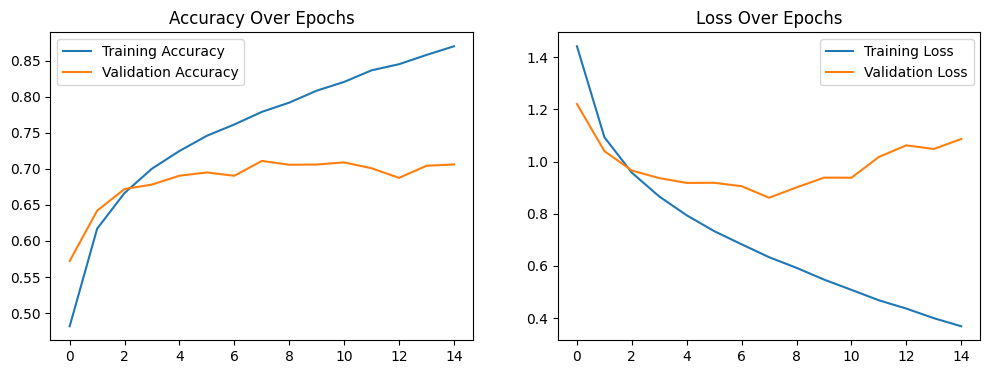

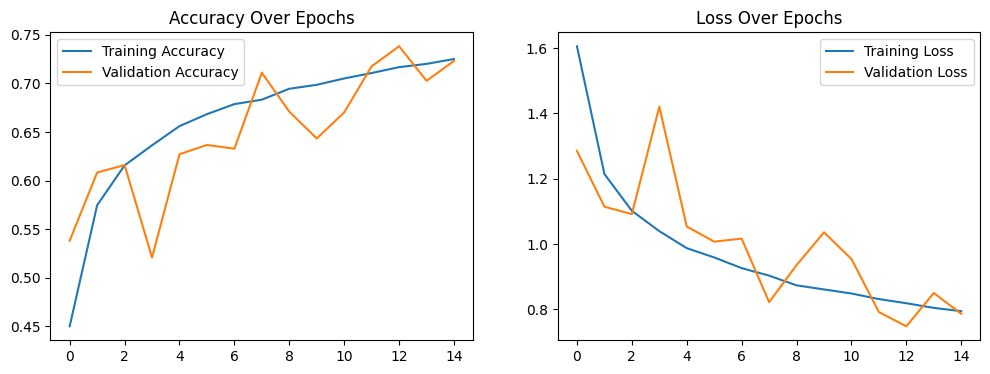

Model A - Test Accuracy: 0.7062
Model B - Test Accuracy: 0.7230


In [5]:
import matplotlib.pyplot as plt

# Train Model A
history_a = model_a.fit(x_train, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(x_test, y_test))

# Train Model B
history_b = model_b.fit(x_train, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(x_test, y_test))

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

plot_history(history_a)  # For Model A
plot_history(history_b)  # For Model B

# Evaluate Model A
loss_a, accuracy_a = model_a.evaluate(x_test, y_test, verbose=0)
print(f"Model A - Test Accuracy: {accuracy_a:.4f}")

# Evaluate Model B
loss_b, accuracy_b = model_b.evaluate(x_test, y_test, verbose=0)
print(f"Model B - Test Accuracy: {accuracy_b:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


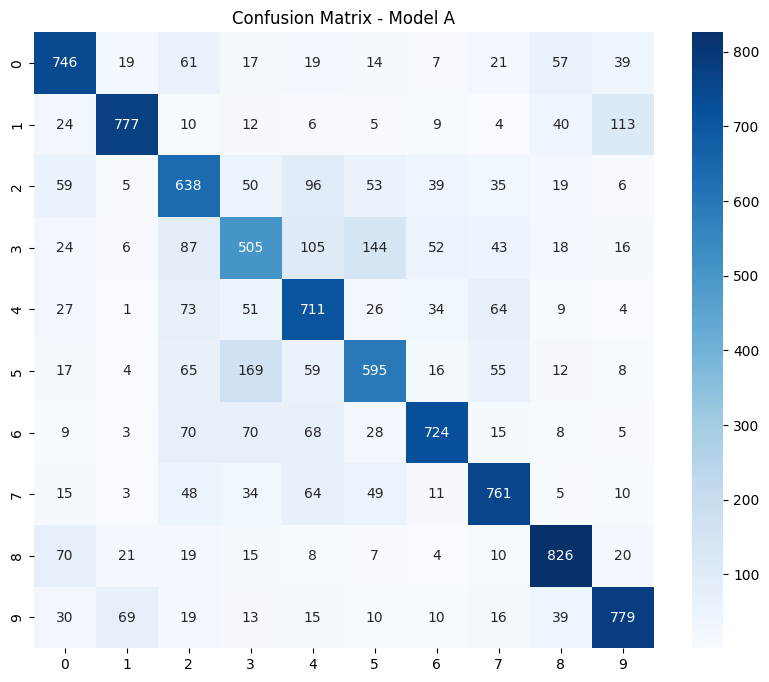

Model B Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1000
           1       0.85      0.85      0.85      1000
           2       0.59      0.62      0.61      1000
           3       0.58      0.52      0.55      1000
           4       0.73      0.63      0.68      1000
           5       0.68      0.59      0.63      1000
           6       0.83      0.78      0.80      1000
           7       0.79      0.79      0.79      1000
           8       0.67      0.93      0.78      1000
           9       0.83      0.80      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000


Comparison:
- Model A (Baseline) Accuracy: 0.7062
- Model B (Enhanced) Accuracy: 0.7230
- Model B shows better generalization due to BatchNorm and Dropout.



In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Confusion Matrix for Model A
y_pred_a = model_a.predict(x_test)
cm_a = confusion_matrix(y_test.argmax(axis=1), y_pred_a.argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_a, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Model A')
plt.show()

# Classification Report for Model B
print("Model B Classification Report:")
y_pred_b = model_b.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred_b.argmax(axis=1)))

# Comparison Summary
print(f"""
Comparison:
- Model A (Baseline) Accuracy: {accuracy_a:.4f}
- Model B (Enhanced) Accuracy: {accuracy_b:.4f}
- Model B shows better generalization due to BatchNorm and Dropout.
""")

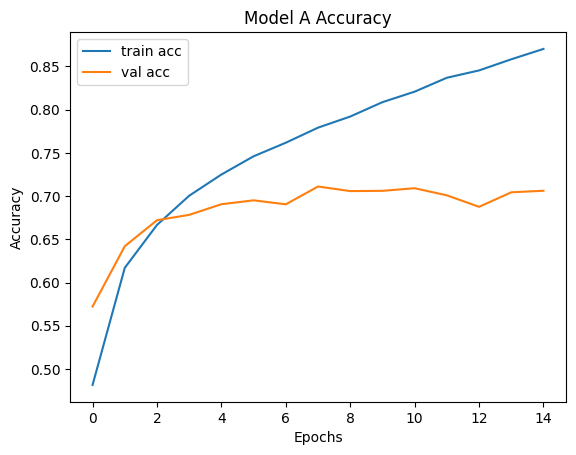

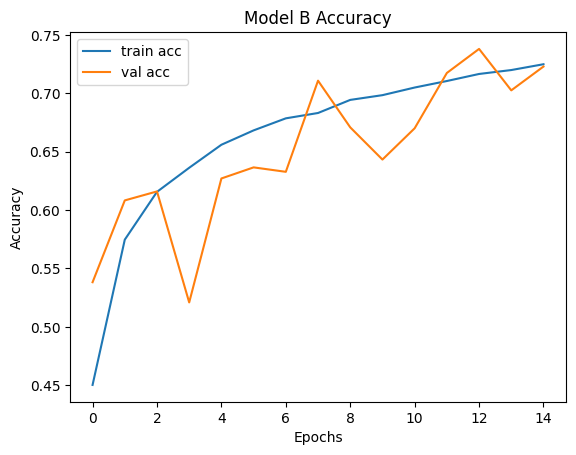

In [7]:
def plot_metrics(history, title):
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history_a, "Model A Accuracy")
plot_metrics(history_b, "Model B Accuracy")
